In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import glam

# Data I/O

In [2]:
datasets = ['krajbich2010', 'krajbich2011', 'folke2016', 'tavares2017']
dataset_labels = ['Krajbich 2010', 'Krajbich 2011', 'Folke 2016', 'Tavares 2017']
N = [2,3,3,2]

In [3]:
data_all = pd.read_csv('data/data_all.csv')
data_odd = data_all[(data_all['trial']%2)==1].copy()

In [4]:
def dataset_iterator(datasets=['krajbich2010', 'krajbich2011', 'folke2016', 'tavares2017'],
                     dataset_labels=['Krajbich 2010', 'Krajbich 2011', 'Folke 2016', 'Tavares 2017'],
                     N=[2,3,3,2],
                     path_data='data/',
                     path_pred='results/predictions/out_of_sample/'):
    
    subjects = np.unique([np.int(s.split('_')[1]) for s in os.listdir(path_pred+'multiplicative/')])
    
    data_odd = pd.read_csv(path_data+'data_aggregate.csv')
    data_odd = data_odd[(data_odd['trial']%2) == 1]

    pred_multiplicative = []
    pred_additive = []
    for subject in subjects: 
        pred_multiplicative.append(
            pd.read_csv(path_pred+'multiplicative/prediction_{}_multiplicative_oos.csv'.format(subject)))
        pred_additive.append(
            pd.read_csv(path_pred+'additive/prediction_{}_additive_oos.csv'.format(subject)))
    pred_multiplicative = pd.concat(pred_multiplicative, sort=False)
    pred_additive = pd.concat(pred_additive, sort=False)
    
    for di, (dataset, n, dataset_label) in enumerate(zip(datasets, N, dataset_labels)):
        
        data_odd_di = data_odd[data_odd['dataset']==dataset].copy()
        pred_multiplicative_di = pred_multiplicative[pred_multiplicative['dataset']==dataset].copy()
        pred_additive_di = pred_additive[pred_additive['dataset']==dataset].copy()
        
        if n == 2:
            data_odd_di = data_odd_di.drop(['item_value_{}'.format(n),
                                      'gaze_{}'.format(n)], axis=1)
            pred_multiplicative_di = pred_multiplicative_di.drop(['item_value_{}'.format(n),
                                      'gaze_{}'.format(n)], axis=1)
            pred_additive_di = pred_additive_di.drop(['item_value_{}'.format(n),
                                      'gaze_{}'.format(n)], axis=1)
        
        yield di, dataset, n, dataset_label, data_odd_di, pred_multiplicative_di, pred_additive_di

# Supplementary Figure 3

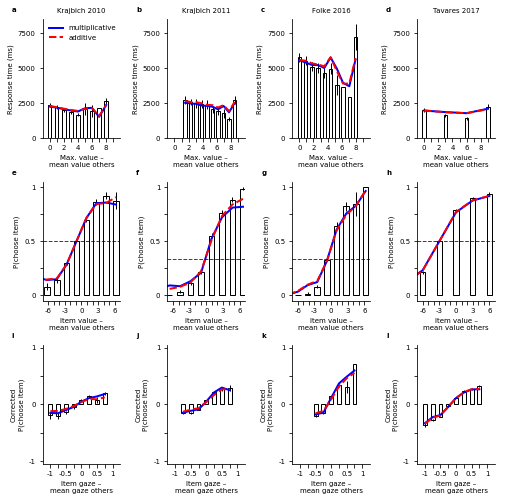

In [5]:
fig, axs = plt.subplots(3, 4,
                        figsize=glam.plots.cm2inch(18, 18),
                        dpi=330, sharex='row')

# plotting settings for predicted data
predalphas = [1, 1]
predlws = [2, 2]
predls = ['-', '--']
predmarkers = [None, None]
predcolors = ['blue', 'red']

# iterate datasets
for dataset_bundle in dataset_iterator():
    (di,
     dataset,
     n,
     dataset_label,
     data_odd,
     pred_multiplicative,
     pred_additive) = dataset_bundle 
    
    # Dataset labeling
    axs[0,di].set_title(dataset_label, fontsize=7)
    
    # Response time by difficulty
    if di == 0:
        _ = glam.plots.plot_rt_by_difficulty(data_odd,
                                             [pred_multiplicative, pred_additive],
                                             prediction_labels=['multiplicative', 'additive'],
                                             xlims=(-1, 10),
                                             ax=axs[0, di],
                                             prediction_alphas=predalphas,
                                             prediction_lws=predlws,
                                             prediction_ls=predls,
                                             prediction_markers=predmarkers,
                                             prediction_colors=predcolors)
    else:
        _ = glam.plots.plot_rt_by_difficulty(data_odd,
                                             [pred_multiplicative, pred_additive],
                                             prediction_labels=None,
                                             xlims=(-1, 10),
                                             ax=axs[0, di],
                                             prediction_alphas=predalphas,
                                             prediction_lws=predlws,
                                             prediction_ls=predls,
                                             prediction_markers=predmarkers,
                                             prediction_colors=predcolors)
    axs[0,di].set_ylim(0, 8500)
    axs[0,di].set_yticks([0, 2500, 5000, 7500])
    axs[0,di].set_yticklabels([0, 2500, 5000, 7500])
    axs[0,di].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    axs[0,di].set_xticklabels([0,'', 2,'', 4, '',6, '', 8, ''])
        
    # P(choose item) by difficulty
    _ = glam.plots.plot_pchoose_by_value_minus_mean_others(data_odd,
                                                           [pred_multiplicative, pred_additive],
                                                           prediction_labels=None,
                                                           xlims=(-7, 7),
                                                           ax=axs[1, di], 
                                                           prediction_alphas=predalphas,
                                                           prediction_lws=predlws,
                                                           prediction_ls=predls,
                                                           prediction_markers=predmarkers,
                                                           prediction_colors=predcolors)
    axs[1,di].set_yticks([0, .25, .5, .75, 1])
    axs[1,di].set_yticklabels([0, '', .5, '', 1])
    axs[1,di].set_xticks([-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6])
    axs[1,di].set_xticklabels([-6, '', '', -3, '', '', 0, '', '', 3, '', '', 6])
    
    # P(choose item) by gaze advantage
    _ = glam.plots.plot_corp_by_gaze_advantage(data_odd,
                                               [pred_multiplicative, pred_additive],
                                               prediction_labels=None,
                                               xlims=(-1.25, 1.25),
                                               ax=axs[2, di], 
                                               prediction_alphas=predalphas,
                                               prediction_lws=predlws,
                                               prediction_ls=predls,
                                               prediction_markers=predmarkers,
                                               prediction_colors=predcolors)
    axs[2,di].set_yticks([-1, -.5, 0, .5, 1])
    axs[2,di].set_yticklabels([-1, '', 0, '', 1])
    axs[2,di].set_xticks([-1, -.75, -.5, -.25, 0, .25, .5, .75,1])
    axs[2,di].set_xticklabels([-1, '', -.5, '', 0, '', .5, '', 1])
    
# add panel labeling
for label, ax in zip(list('abcdefghijkl'), axs.ravel()):
    ax.text(-0.4, 1.1, label, transform=ax.transAxes,
            fontsize=7, fontweight='bold', va='top')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Font sizes
    ax.tick_params(axis='both', labelsize=7)
    
fig.tight_layout()
fig.savefig('results/figures/si_figure_3_additive-vs-multiplicative_group-average.pdf', dpi=330)
fig.savefig('results/figures/si_figure_3_additive-vs-multiplicative_group-average.png', dpi=330)